# Пример понижения размерности с помощью PCA

In [17]:
import numpy as np

In [18]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)

In [19]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

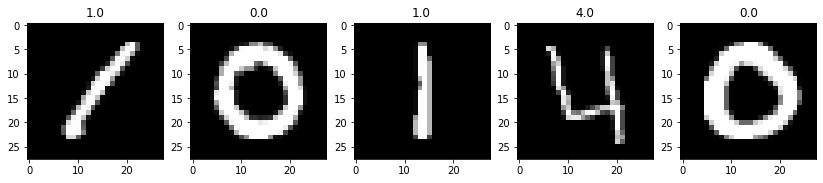

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [21]:
# выбираем семпл данных для обработки
choices = np.random.choice(train_img.shape[0], 10000)

y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [22]:
# центрируем данные
X_mean = X.mean(axis=0)
X -= X_mean

In [23]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [24]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

## Собственные числа

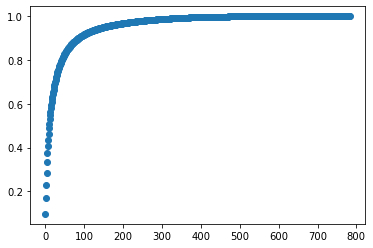

In [25]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [26]:
for i in range(5):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.097
[001] 0.168
[002] 0.228
[003] 0.283
[004] 0.332


## Понижаем размерность

In [27]:
S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=32 S=0.751


In [28]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [32]:
Xrot_reduced[0]

array([ 268.9694  ,  380.7968  ,  182.5424  ,  779.21497 ,  390.1265  ,
       -409.8918  , -606.5241  ,   51.443863,  159.6387  ,  150.53271 ,
       -106.856705,  252.54263 , -204.76453 , -490.0812  ,  400.2799  ,
       -141.85773 ,  -58.95466 ,  217.77023 ,   61.171917,  365.2367  ,
        178.9121  ,  116.889496,  -42.742817,    9.98678 , -408.41214 ,
        204.12642 ,   57.99472 , -124.48105 ,   35.794353, -184.71858 ,
         64.27505 ,  -54.729855], dtype=float32)

## Восстанавливаем изображение после понижения размерности

In [29]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

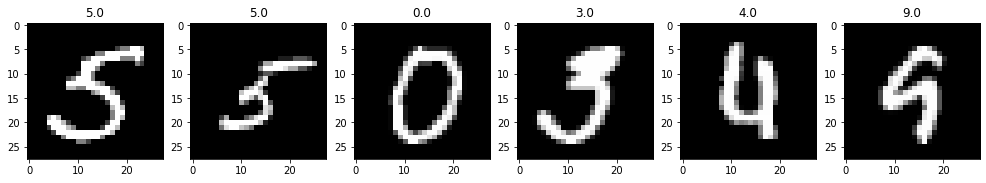

In [30]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)), cmap='gray');

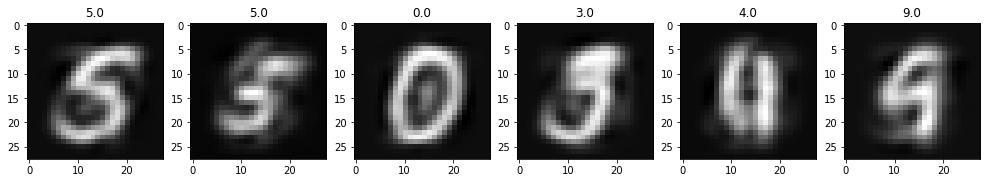

In [31]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)) + X_mean.reshape((28,28)), cmap='gray');

## Визуализация собственных векторов

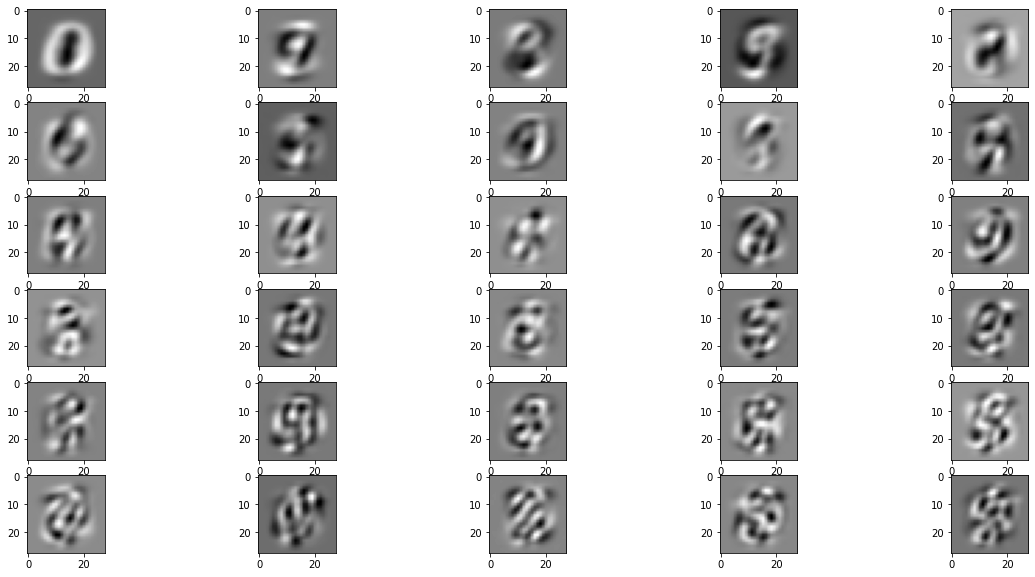

In [36]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(U.T[:30, :], 1):
    subplot = fig.add_subplot(6, 5, i)
    plt.imshow(img.reshape((28,28)), cmap='gray');

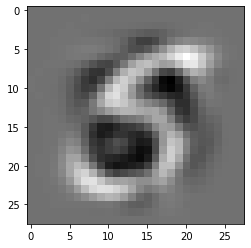

In [38]:
plt.imshow(Xrot_restored[0].reshape((28,28)),cmap='gray')

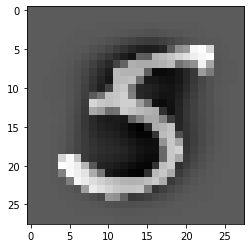

In [39]:
plt.imshow(X[0].reshape((28,28)),cmap='gray')

In [47]:
Xrot_reduced.shape

(10000, 32)

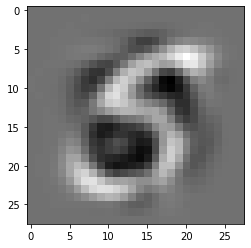

In [54]:
img_rest = np.zeros((28,28), dtype=np.float32)
for i in range(32):
    img_rest += (U.T[i, :] * Xrot_reduced[0, i]).reshape(28, 28)
plt.imshow(img_rest, cmap='gray')